![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

# Parte 1: Iteração de Rayleigh

Vimos que podemos iterar um vetor $v$ pela matriz $A$, obtendo a sequência de vetores $A^nv$, por multiplicações sucessivas, e que isso permite encontrar um autovetor.

## Questão 1

Implemente uma função `itera(A,v,tol,maxiter)` que itera o vetor $v$, normalizando a cada iteração.

O método para quando o relativo entre $Av_k$ e $\lambda_k v_k$ for menor do que `tol`,
ou após realizar `maxiter` iterações.

A função retorna `(vs, ls)`, respectivamente:
- as estimativas do autovetor (com norma 1);
- as estimativas correspondentes para o autovalor.

In [2]:
# v_k é o candidado a autovetor e l_k, candidato a autovalor
# eu não incluo o vetor inicial v na lista de estimativas

def itera(A, v, tol = 1e-6, maxiter = 1000):
    v = np.asarray(v)
    A = np.asarray(A)
    n, m = np.shape(A)
    assert n == m, 'A must be square'
    v /= norm(v)

    vs, ls = list(), list()
    Av_k = v

    for i in range(maxiter):
        
        v_k = Av_k # atualiza v_k
        Av_k = A@v_k # realiza a iteração sobre v_k 
        l_k = Av_k@v_k # o 'candidato' a autovalor vai ser a projeção da transformada do vetor em sua direção:
        # v_k unitário => \lambda = <Av_k, v_k>

        if norm(Av_k - l_k*v_k)/norm(Av_k) < tol: # se estiver bom o suficiente...
            Av_k /= norm(Av_k) # normaliza pra adicionar na lista
            vs.append(Av_k)
            ls.append(l_k)
            break

        Av_k /= norm(Av_k) # normaliza pra continuar a iteração e adicionar na lista
        vs.append(Av_k)
        ls.append(l_k)

    return vs, ls

In [3]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2])

assert(abs(ls[-1] - 3) < 1e-6)
assert(all(abs(vs[-1] - alvo) < 1e-6))
assert(10 < len(ls) < 20)

In [4]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2], tol=1e-12)

assert(abs(ls[-1] - 3) < 1e-12)
assert(all(abs(vs[-1] - alvo) < 1e-12))
assert(20 < len(ls) < 30)

## Questão 2: Convergência

Vejamos como o algoritmo "converge" para o autovetor.
Use os vetores intermediários e faça um gráfico da evolução do erro entre os $v$'s produzidos e o autovetor $v_\lambda$.

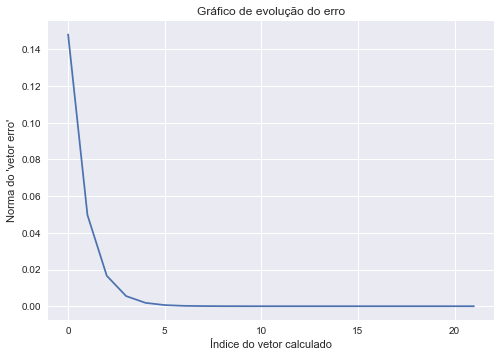

In [5]:
plt.style.use('seaborn') # só pra não perder o costume. gosto desse estilo de plot

ax = None
vs, ls = itera(A, np.random.rand(2), tol=1e-10)

erro_vs = [norm(alvo - v) for v in vs] # compara com o autovetor já conhecido

plt.plot(erro_vs)
plt.xlabel('Índice do vetor calculado')
plt.ylabel('Norma do \'vetor erro\'')
plt.title('Gráfico de evolução do erro')

ax = plt.gca()
plt.show()

In [6]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()

assert 1e-12 < min(ys) < 1e-10
assert np.all(ys[:-1] > ys[1:])

O que o último assert quer dizer?

O assert verifica se o elemento da posição $j$ da primeira lista é maior que o elemento de mesma posição da segunda lista. `ys[:-1]` é a lista dos `ys` removendo-se o último elemento (começa do primeiro e termina no penúltimo) e `ys[1:]` é a lista dos `ys` removendo-se o primeiro elemento (começa do segundo e termina no último). Dessa forma, o assert verifica se `ys[0] > ys[1]`, `ys[1] > ys[2]` ... etc. Verifica se a sequência dos `ys` é monotonicamente decrescente.

## Questão 3: Convergência comparada

Para cada um dos vetores `d1` e `d2` abaixo, considere a matriz $A = \operatorname{diag}(d_i)$ correspondente.

In [7]:
d1 = [1,10,20,30,31,32]
d2 = [1,10,20,29,30,32]

Qual é o autovetor com o maior autovalor para $A_1$ e $A_2$?

Considerando autovetores unitários, em ambos os casos o autovetor associado ao maior autovalor, $32$, será o vetor $v = (0, 0, 0, 0, 0, 1)$.

Agora, compare a velocidade de convergência do autovetor usando `itera` para cada uma destas matrizes,
fazendo o gráfico do erro entre os vetores gerados para $A_1$ e $A_2$ no mesmo eixo.

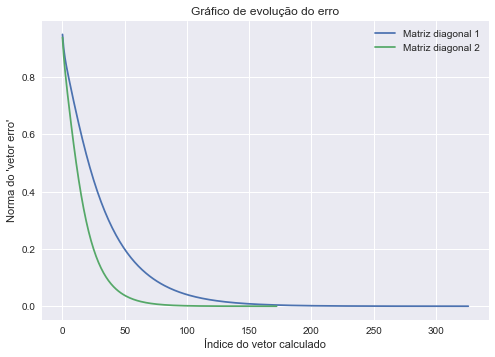

In [8]:
ax = None

vs_1, _ = itera(np.diag(d1), np.ones(6))
vs_2, _ = itera(np.diag(d2), np.ones(6))

auto_v = np.array([0, 0, 0, 0, 0, 1])
erro_vs_1 = [norm(auto_v - v) for v in vs_1]

erro_vs_2 = [norm(auto_v - v) for v in vs_2]

plt.plot(erro_vs_1, label = 'Matriz diagonal 1')
plt.plot(erro_vs_2, label = 'Matriz diagonal 2')
plt.xlabel('Índice do vetor calculado')
plt.ylabel('Norma do \'vetor erro\'')
plt.title('Gráfico de evolução do erro')
plt.legend()

ax = plt.gca()
plt.show()

In [9]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Para qual matriz há convergência mais rápida?  Como você explicaria isso?

O segundo caso tem uma convergência mais rápida. O que atrasa a convergência num caso e acelera no outro é a razão entre os maiores autovalores. Se o segundo maior autovalor está mais próximo do primeiro em um caso, fica mais difícil 'apagar' a projeção do vetor que tá sendo iterado no autoespaço associado a esse segundo autovalor, logo, a convergência é mais demorada. Continuando o raciocínio, acho que a razão entre **o maior** autovalor e o terceiro, quarto, ..., n-ésimo autovalores maiores também têm uma certa influência na 'duração' da convergência, mas essa influência é menos acentuada se comparada com a razão entre os dois maiores. Nesse caso aqui, só os três maiores provocam essa diferença, já que os três menores são iguais nos dois vetores.

## Questão 4: Convergência?

Sejam $\theta \in [0,2\pi]$ e $\alpha \in \mathbb{R}$,
e considere a matriz 
$$A(\theta, \alpha) = \begin{bmatrix} 
\cos(\theta) & \sin(\theta) & 0\\
-\sin(\theta) &\cos(\theta) &  0\\
0 & 0 & \alpha\\
\end{bmatrix}.$$

Qual a interpretação geométrica dessa matriz?

Ela recebe um vetor do $\mathbb{R}^3$, rotaciona ele no sentido horário em um ângulo de $\theta$ no plano gerado por $(1, 0, 0)$ e $(0, 1, 0)$ e redimensiona o vetor em um fator $\alpha$ na direção de $(0, 0, 1)$.

Quais são os autovetores de $A$ (em função de $\theta$ e $\alpha$)?

Aqui eu vou ignorar as contas pro caso em que $\theta = 2 k \pi$ já que, nesse caso, a matriz $A$ fica $$A = \begin{pmatrix}  1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & \alpha \end{pmatrix}$$ e os autovalores dela vão ser $1$ e $\alpha$ e os autovetores serão a base canônica do $\mathbb{R}^3$. E também vou ignorar pro caso em que $\theta = (2 k + 1) \pi$, já que, nesse caso, a matriz $A$ fica $$A = \begin{pmatrix}  -1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & \alpha \end{pmatrix}$$ e os autovalores dela vão ser $-1$ e $\alpha$ e os autovetores também serão a base canônica do $\mathbb{R}^3$. Se $\theta \neq k \pi$ as contas seguem:

## Calculando os autovalores:

$\lambda$ é autovalor $\Rightarrow \lambda$ é raíz do polinômio característico. Logo:

$$\begin{vmatrix} 
\cos(\theta) - x & \sin(\theta) & 0
\\ -\sin(\theta) & \cos(\theta) - x &  0
\\ 0 & 0 & \alpha - x
\end{vmatrix} = (\cos(\theta) - x)^2 (\alpha - x) + \sin^2(\theta) (\alpha - x) = (\alpha - x) ((\cos(\theta) - x)^2 + \sin^2(\theta)) = 0$$

Duas soluções:

I) $\lambda = \alpha$

II) $\lambda$ é raíz de $(\cos(\theta) - x)^2 + \sin^2(\theta) = 0$

Resolvendo II:

$$\cos^2(\theta) - 2 \cos(\theta) x + x^2 + \sin^2(\theta) = 0 \Rightarrow 1 - 2 \cos(\theta) x + x^2 = 0 \Rightarrow x = \frac{2 \cos(\theta) \pm \sqrt{4 \cos^2(\theta) - 4}}{2} = \cos(\theta) \pm \sqrt{\cos^2(\theta) - 1} \Rightarrow $$
$$x = \cos(\theta) \pm \sqrt{- \sin^2(\theta)} = \cos(\theta) \pm i \sin(\theta)$$

Os autovalores são: $\alpha, \cos(\theta) + i \sin(\theta), \cos(\theta) - i \sin(\theta)$.

## Calculando os autovetores:

Quanto ao autovalor $\alpha$, é fácil de ver que o autovetor unitário associado a ele é $v_1 = (0, 0, 1)$.

Quanto aos outros, basta resolver a equação $(A - I\lambda)x = 0$:

$$\lambda = \cos(\theta) + i \sin(\theta) \Rightarrow \begin{pmatrix}  \cos(\theta) - (\cos(\theta) + i \sin(\theta)) & \sin(\theta) & 0 \\ -\sin(\theta) & \cos(\theta) - (\cos(\theta) + i \sin(\theta)) &  0 \\ 0 & 0 & \alpha - (\cos(\theta) + i \sin(\theta)) \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$$

$$\Rightarrow \begin{pmatrix} - i \sin(\theta) & \sin(\theta) & 0 \\ -\sin(\theta) & - i \sin(\theta)) &  0 \\ 0 & 0 & \alpha - \cos(\theta) - i \sin(\theta) \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} \Rightarrow \begin{cases} x \sin(\theta) + y i \sin(\theta) = 0 \\ z (\alpha - \cos(\theta) - i \sin(\theta)) = 0 \end{cases} \Rightarrow \begin{cases} y = xi \\ z = 0 \end{cases}$$

Com isso, um autovetor unitário associado a $\lambda = \cos(\theta) + i \sin(\theta)$ é $v_2 = \frac{\sqrt{2}}{2} (1, i, 0)$.

O autovetor associado ao autovalor $\lambda = \cos(\theta) - i \sin(\theta)$, que é o conjugado de $\cos(\theta) + i \sin(\theta)$, vai ser o autovetor cujas coordenadas são as conjugadas do autovetor anterior. Assim, um terceiro autovetor é $v_3 = \frac{\sqrt{2}}{2} (-1, i, 0)$.

## Concluindo:

Se $\theta = 2 k \pi$, os autovalores serão $1$ (multiplicidade $2$) e $\alpha$ e os autovetores serão a base canônica do $\mathbb{R}^3$.

Se $\theta = (2 k + 1) \pi$, os autovalores serão $-1$ (multiplicidade $2$) e $\alpha$ e os autovetores serão a base canônica do $\mathbb{R}^3$.

Se $\theta \neq k \pi$, sendo os autovalores: $\alpha, \cos(\theta) + i \sin(\theta), \cos(\theta) - i \sin(\theta)$, os autovetores unitários associados a eles são, respectivamente: $$(0, 0, 1), \frac{\sqrt{2}}{2} (1, i, 0), \frac{\sqrt{2}}{2} (-1, i, 0).$$

Implemente a função abaixo que gera a matriz $A$:

In [10]:
def make_matrix(theta, alpha):
    matrix = [[np.cos(theta), np.sin(theta), 0],
              [-np.sin(theta), np.cos(theta), 0],
              [0, 0, alpha]]
    
    return np.array(matrix)

In [11]:
assert np.allclose(make_matrix(0,1),np.eye(3))
assert np.allclose(make_matrix(np.pi,0.5),[[-1,0,0],[0,-1,0],[0,0,0.5]])

Fixando $\theta = \dfrac{\pi}{4}$,
faça um gráfico do número de iterações necessários para calcular o maior autovetor,
em função de $\alpha \in [0.5,1.5]$, com precisão `1e-12`.

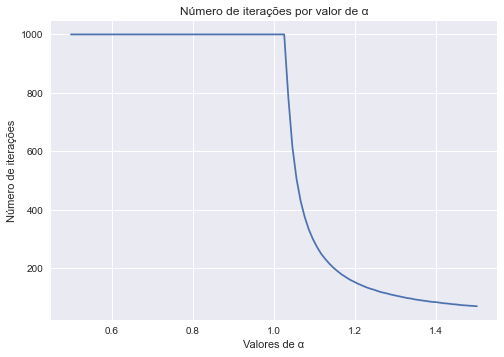

In [12]:
alphas = np.linspace(0.5, 1.5, 100)
ax = None

v = np.random.rand(3)
num_iter = list()

for alpha in alphas:
    M = make_matrix(np.pi/4, alpha)
    n = len(itera(M, v, 1e-12)[0])
    num_iter.append(n)

plt.plot(alphas, num_iter)
plt.xlabel('Valores de α')
plt.ylabel('Número de iterações')
plt.title('Número de iterações por valor de α')

# plt.axvline(1.05)

ax = plt.gca()
plt.show()

In [13]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert 100 > ys.min() > 60
assert ys[55] < 600
assert ys[50] > 900

Agora, faça o gráfico com a estimativa do autovalor, novamente em função de $\alpha$.

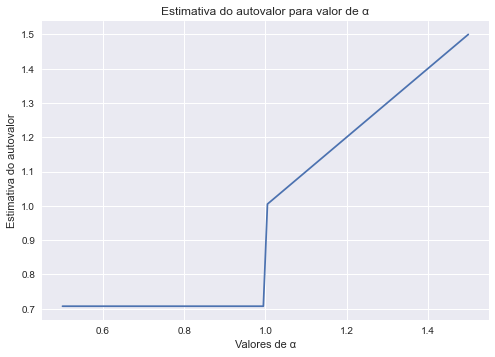

In [14]:
ax = None

lambdas = list()

for alpha in alphas:
    M = make_matrix(np.pi/4, alpha)
    lambda_ = itera(M, v, 1e-12)[1][-1]
    lambdas.append(lambda_)

plt.plot(alphas, lambdas)
plt.xlabel('Valores de α')
plt.ylabel(f'Estimativa do autovalor')
plt.title(f'Estimativa do autovalor para valor de α')

ax = plt.gca()
plt.show()

In [15]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert np.all(0.7 <= ys) and np.all(ys <= 1.5)

Como explicar a variação no número de iterações? O que isso tem a ver com o autovalor retornado?

Se $\alpha < 1$, os autovalores de maior módulo são os complexos (que têm módulo $1$). Como estamos tentando forçar uma procura de autovalores reais e como os autovalores complexos têm o mesmo módulo, o algoritmo vai ficar oscilando sem chegar a lugar nenhum. Vai cair num loop infinito e o código só vai parar de rodar quando alcançar o máximo de iterações.

Quando $\alpha > 1$, seu módulo supera o módulo dos outros dois autovalores complexos e $\alpha$ passa a ser o maior autovalor. Com isso, se houverem passos suficientes, e precisão suficiente, o algoritmo deve convergir pra $\alpha$.

No primeiro caso, $\alpha < 1$, o autovalor encontrado foi algo próximo de $\frac{\sqrt{2}}{2}$, que é a parte real de $\cos \left(\frac{\pi}{4} \right) \pm i \sin \left(\frac{\pi}{4} \right)$. Já no segundo caso, $\alpha > 1$, o autovalor retornado é o próprio $\alpha$, como era de se esperar.

# Questão 5: Autovalores negativos

Em princípio, tudo deveria funcionar de forma muito similar para autovalores **negativos**.

Estude o caso $\alpha \in [-1.5, -0.5]$, fazendo os dois gráficos lado a lado.

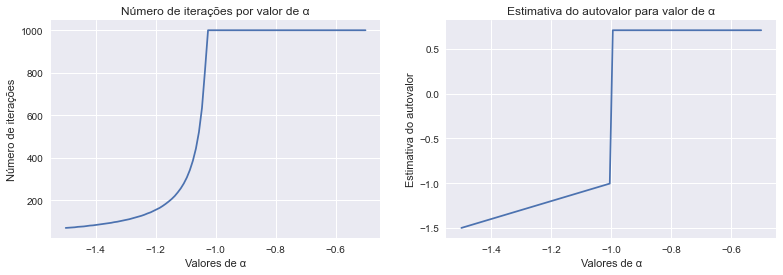

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
negalphas = np.linspace(-1.5, -0.5, 100)

num_iter = list()

for alpha in negalphas:
    M = make_matrix(np.pi/4, alpha)
    n = len(itera(M, v, 1e-12)[0])
    num_iter.append(n)

ax1.plot(negalphas, num_iter)
ax1.set_xlabel('Valores de α')
ax1.set_ylabel('Número de iterações')
ax1.set_title('Número de iterações por valor de α')

# ax1.axvline(-1.05)

lambdas = list()

for alpha in negalphas:
    M = make_matrix(np.pi/4, alpha)
    lambda_ = itera(M, v, 1e-12)[1][-1]
    lambdas.append(lambda_)

ax2.plot(negalphas, lambdas)
ax2.set_xlabel('Valores de α')
ax2.set_ylabel(f'Estimativa do autovalor')
ax2.set_title(f'Estimativa do autovalor para valor de α');

In [17]:
assert ax1.title.get_text() != ""
assert len(ax1.lines) == 1
assert ax1.get_xlabel() != ""

ys1 = ax1.lines[0].get_ydata()

assert 100 > ys1.min() > 60
assert ys1[44] < 600
assert ys1[49] > 900


assert ax2.title.get_text() != ""
assert len(ax2.lines) == 1
assert ax2.get_xlabel() != ""

ys2 = ax2.lines[0].get_ydata()

assert np.all(0.71 >= ys2)
assert np.all(ys2 >= -1.5)

Para funcionar, o teste `ys1[i] < 600` teve seu índice foi trocado de `55` para `44`.
Explique esta mudança, tanto do ponto de vista matemático,
quanto da linguagem Python. 

No primeiro gráfico, as linhas são decrescentes e o $\alpha$ pro qual `ys < 600` tem que estar à direita da abscissa de `ys = 600`. No segundo, o traço é crescente e o $\alpha$ tem que estar à esquerda.

Fazendo uns testes com o `plt.axvline()`, eu verifiquei que `ys < 600` ocorre, no primeiro exemplo, pra $\alpha > 1.05$ e, no segundo, para $\alpha < -1.05$.

O comando `np.linspace(a, b, n)` 'encaixa' 99 intervalos de mesma medida 'h' entre os limites inf e sup. Como os intervalos têm o mesmo tamanho e estão sendo dividos em $99$ pedaços, $h = \frac{1.5 - 0.5}{99} = \frac{1}{99}$. Basta encontrar quais os índices de $\alpha$ em cada caso que satisfazem $\alpha > 1.05$ em um e $\alpha < -1.05$ no outro usando conhecimento básico de progressão aritmética.

No primeiro caso ($[a, b] = [0.5, 1.5]$), contando da forma 'pythonica', o índice de a é 0. O índice do $\alpha$ desejado vai ser um $n$ tal que: $0.5 + n/99 = 1.05$. Com isso: $n/99 = 0.55 \Rightarrow n = 54.45$. Como $n$ deve estar à direita desse valor, o primeiro que satisfaz a isso é $n = 55$.

No segundo caso, ($[a, b] = [-1.5, -0.5]$), contando da forma 'pythonica', o índice de a é 0. O índice do $\alpha$ desejado vai ser um $n$ tal que: $-1.5 + n/99 = -1.05$. Com isso: $n/99 = 0.45 \Rightarrow n = 44.55$. Como $n$ deve estar à esquerda desse valor, o primeiro que satisfaz a isso é $n = 44$.

Explique, também, porque $0.71$ deve ser suficiente como cota superior. (Aqui, é "só" matemática, mas a matemática pode ser um pouco mais complexa)

Se $\alpha < -1$, o autovalor encontrado vai ser o próprio $\alpha$, já que vai ser o de maior módulo. Isso é óbvio e descarta análise. A gente só tem que se preocupar aqui com o que acontece com os maiores autovalores (complexos), quando eles são os de maior módulo, ou seja, $\alpha > -1$.

Veja que $0.71$ é uma aproximação por cima da parte real dos autovalores complexos. Como $\frac{\sqrt{2}}{2} \approx 0.70710678$ é o maior valor retornado, a cota superior tem que ser maior do que isso, então $0.71$ tá bom. A explicação matematicamente formal segue:

Vou omitir alguns passos porque as contas são muitas, mas vou omitir somente aquilo que é facilmente verificável pelo uso de álgebra.

Volte na questão onde consta o código e verifique que as estimativas dos autovalores são calculadas por `l_k = Av_k@v_k`, que, nesse caso, é equivalente a fazer $\lambda_k = \langle Av_k, v_k \rangle$ (lembrando que o algoritmo sempre normaliza $v_k$ antes de fazer a aplicação $A$). Pra entender o que acontece na questão, basta verificar pra onde converge $\lambda_k = \langle A v_k, v_k \rangle$ quando $k$ cresce, para certos valores de $\theta$ e $\alpha$.

Sejam $$A = \begin{pmatrix} \cos(\theta) & \sin(\theta) & 0 \\ -\sin(\theta) &\cos(\theta) &  0 \\ 0 & 0 & \alpha \end{pmatrix}$$ a matriz da aplicação linear e $$v_0 = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$$ um vetor unitário inicial qualquer.

Como $v_1 = Av_0$, temos que: $$v_1 = \begin{pmatrix} \cos(\theta) & \sin(\theta) & 0 \\ -\sin(\theta) &\cos(\theta) &  0 \\ 0 & 0 & \alpha \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} x \cos(\theta) + y \sin(\theta) \\ - x \sin(\theta) + y \cos(\theta) \\ z \alpha \end{pmatrix}$$

Após normalizar $v_1$ ficamos com: $$v_1 = \frac{1}{\sqrt{x^2 + y^2 + z^2\alpha^2}} \begin{pmatrix} x \cos(\theta) + y \sin(\theta) \\ - x \sin(\theta) + y \cos(\theta) \\ z \alpha \end{pmatrix}$$

Fazendo o mesmo com $v_2$, temos que: $$v_2 = A v_1 = \frac{1}{\sqrt{x^2 + y^2 + z^2\alpha^2}} \begin{pmatrix} \cos(\theta) & \sin(\theta) & 0 \\ -\sin(\theta) &\cos(\theta) &  0 \\ 0 & 0 & \alpha \end{pmatrix} \begin{pmatrix} x \cos(\theta) + y \sin(\theta) \\ - x \sin(\theta) + y \cos(\theta) \\ z \alpha \end{pmatrix} = \frac{1}{\sqrt{x^2 + y^2 + z^2\alpha^2}} \begin{pmatrix} x \cos(2\theta) + y \sin(2\theta) \\ - x \sin(2\theta) + y \cos(2\theta) \\ z \alpha^2 \end{pmatrix}$$

Após normalizar: $$v_2 = \frac{1}{\sqrt{x^2 + y^2 + z^2\alpha^4}} \begin{pmatrix} x \cos(2\theta) + y \sin(2\theta) \\ - x \sin(2\theta) + y \cos(2\theta) \\ z \alpha^2 \end{pmatrix}$$

E aí fica fácil de ver, por um argumento simples de indução, que, após a normalização, um $v_k$ qualquer é dado por:

$$v_k = A^k v_0 = \frac{1}{\sqrt{x^2 + y^2 + z^2\alpha^{2k}}} \begin{pmatrix} x \cos(k\theta) + y \sin(k\theta) \\ -x \sin(k\theta) + y \cos(k\theta) \\ z \alpha^k\end{pmatrix}$$

Já que $\lambda_k = \langle A v_k, v_k \rangle$, temos que:

$$A v_k = \frac{1}{\sqrt{x^2 + y^2 + z^2\alpha^{2k}}} \begin{pmatrix} x \cos(k+1)\theta + y \sin(k+1)\theta \\ -x \sin(k+1)\theta + y \cos(k+1)\theta \\ z \alpha^{k+1}\end{pmatrix}$$

($A v_k$ não é normalizado)

Logo:

$$\lambda_k = \langle A v_k, v_k \rangle = \frac{1}{x^2 + y^2 + z^2\alpha^{2k}} \begin{pmatrix} x \cos(k+1)\theta + y \sin(k+1)\theta \\ -x \sin(k+1)\theta + y \cos(k+1)\theta \\ z \alpha^{k+1}\end{pmatrix} \cdot \begin{pmatrix} x \cos(k\theta) + y \sin(k\theta) \\ -x \sin(k\theta) + y \cos(k\theta) \\ z \alpha^k\end{pmatrix}$$

Faça $(k+1)\theta = a$ e $k\theta = b$, pra economizar letras. O produto escalar acima nos dá:

$$\begin{pmatrix} x \cos(a) + y \sin(a) \\ -x \sin(a) + y \cos(a) \\ z \alpha^{k+1}\end{pmatrix} \cdot \begin{pmatrix} x \cos(b) + y \sin(b) \\ -x \sin(b) + y \cos(b) \\ z \alpha^k\end{pmatrix} =$$

$$= x^2 \cos(a)\cos(b) + xy \cos(a)\sin(b) + xy \cos(b)\sin(a) + y^2 \sin(a)\sin(b) + x^2 \sin(a)\sin(b) - xy \cos(a)\sin(b) - xy \cos(b)\sin(a) + y^2 \cos(a)\cos(b) + z \alpha^{2k+1} =$$

$$= x^2 \cos(a)\cos(b) + y^2 \sin(a)\sin(b) + x^2 \sin(a)\sin(b) + y^2 \cos(a)\cos(b) + z \alpha^{2k+1} =$$

$$= (\cos(a)\cos(b) + \sin(a)\sin(b))(x^2 + y^2) + z \alpha^{2k+1} = \cos(a-b)(x^2 + y^2) + z \alpha^{2k+1}$$

Como $(k+1)\theta = a$ e $k\theta = b$, concluímos que o produto escalar fica: $$\cos(a-b)(x^2 + y^2) + z \alpha^{2k+1} = \cos(\theta)(x^2 + y^2) + z \alpha^{2k+1}$$

Com isso, a expressão para $\lambda_k$ é:

$$\lambda_k = \langle A v_k, v_k \rangle = \frac{\cos(\theta)(x^2 + y^2) + z \alpha^{2k+1}}{x^2 + y^2 + z^2\alpha^{2k}}$$

Lembrando que estamos analisando o caso $0 > \alpha > -1$. Nesse caso, para $k$ grande o suficiente, já que $|\alpha| < 1$, temos que $\alpha^k \to 0$. Com isso, no limite (matematicamente o infinito e computacionalmente, a precisão do computador), concluímos que: $$\lambda_k \to \frac{\cos(\theta)(x^2 + y^2)}{x^2 + y^2} = \cos(\theta) \Rightarrow \lambda_k \to \cos(\theta).$$

Nesse exemplo específico, $\cos(\frac{\pi}{4}) \approx 0.70710678 < 0.71$. Então, $0.71$ é um limite superior legal pra colocar no gráfico.

# Questão 6: Mudando $\theta$

A velocidade de convergência muda ao trocar $\theta$?
Teste outros valores, e refaça os gráficos, agora com várias curvas em cada eixo,
uma para cada um dos valores de $\theta$ que você estudou.

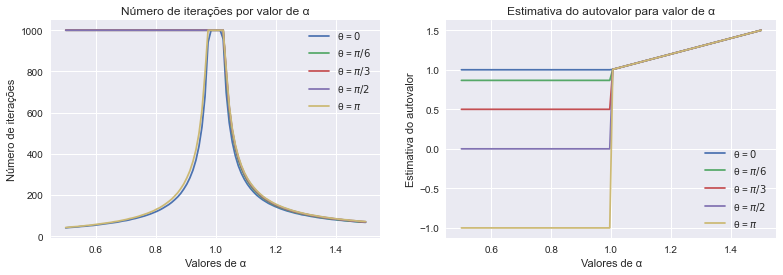

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
alphas = np.linspace(0.5, 1.5, 100)
#alphas = np.linspace(-1.5, -0.5, 100)

thetas = {np.pi*0:'0', np.pi*1/6:'\pi/6', np.pi*1/3:'\pi/3', np.pi*1/2:'\pi/2', np.pi:'\pi'}

for theta in thetas:

    num_iter = list()

    for alpha in alphas:
        M = make_matrix(theta, alpha)
        n = len(itera(M, v, 1e-12)[0])
        num_iter.append(n)
    
    ax1.plot(alphas, num_iter, label=(f'θ = ${thetas[theta]}$'))

    lambdas = list()

    for alpha in alphas:
        M = make_matrix(theta, alpha)
        lambda_ = itera(M, v, 1e-12)[1][-1]
        lambdas.append(lambda_)
    
    ax2.plot(alphas, lambdas, label=(f'θ = ${thetas[theta]}$'))

ax1.set_xlabel('Valores de α')
ax1.set_ylabel('Número de iterações')
ax1.set_title('Número de iterações por valor de α')

ax2.set_xlabel('Valores de α')
ax2.set_ylabel(f'Estimativa do autovalor')
ax2.set_title(f'Estimativa do autovalor para valor de α')

ax1.legend()
ax2.legend();

O que você observa?  Isso faz sentido?

Quanto ao gráfico do número de iterações, para $\theta = \pi/6, \pi/3, \pi/2$ os autovalores e autovetores tem parte imaginária não nula e ocorreu o esperado: se $\alpha < 1$, o autovalor de maior módulo é complexo, o algoritmo não encontra autovetor e só para quando atinge o máximo de iterações. Se $\alpha > 1$, $\alpha$ é o maior autovalor e o algoritmo encontra o autovetor.

Olhando no mesmo gráfico, para $\theta = 0, \pi$, acho que poderia ter ocorrido um certo problema, que não ocorreu aqui. Se $\alpha < 1$, o autovalor de maior módulo em cada um desses casos vai ser, respectivamente, $1$ e $-1$, os quais têm um autoespaço de dimensão $2$ associado. Acho que o algoritmo poderia não ter encontrado nenhum vetor associado a esses autovalores e com isso ficaria oscilando sem encontrar ninguém. Mas aqui ele encontrou perfeitamente. De fato, todo vetor pertencente ao autoespaço associado aos autovalores citados é 'digno' de ser reconhecido como um autovetor pelo método da potência. Eu diria que o que ocorreu aqui é que logo que o vetor sendo iterado 'caiu' no autoespaço, o código o reconheceu como um autovetor e já retornou ele. Deu tudo certo, mas acho que poderia não ter dado. Fiz essa ressalva porque acho que não é tão intuitivo quanto o resto das coisas.

Por fim, o gráfico da estimativa dos autovalores faz total sentido. As contas que mostram o porquê foram expostas na questão anterior: o algoritmo converge para a parte real do autovalor.

Obs: Optei por usar os alphas variando de $0.5$ a $1.5$, mas fazendo variar de $-1.5$ a $-0.5$ ocorre o equivalente.